# Lab 2: Image Enhancement

In [17]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import ndimage
import random

# Path to directory with images
dataDir = '../images'

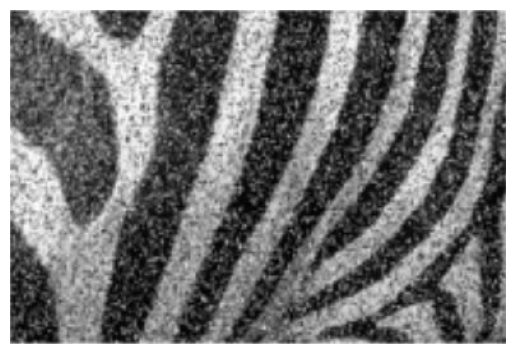

In [3]:
# Open noisy image
img = cv2.imread(os.path.join(dataDir, 'zebra_01_noisy.jpg'), cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
_ = plt.axis("off")

### 1. Filtering and Smoothing

[Check tutorial here!](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)

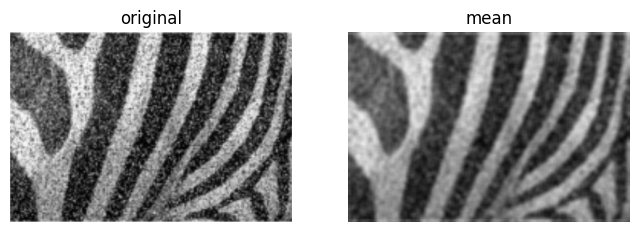

In [4]:
# Apply mean filter to the image
img_mean_filter = cv2.blur(img, ksize=(7, 7))

# Show image
f, axarr = plt.subplots(1, 2, figsize=(8, 4))
axarr[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axarr[0].set_title("original")
axarr[0].axis("off")

axarr[1].imshow(img_mean_filter, cmap="gray", vmin=0, vmax=255)
axarr[1].set_title("mean")
_ = axarr[1].axis("off")

Exercise 1.1: Apply median, Gaussian and bilateral filters to the image.

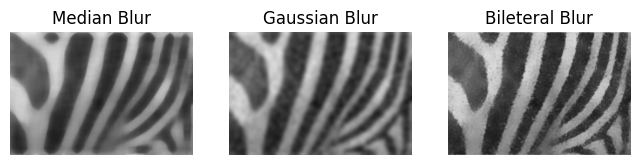

In [37]:
# Median Filter 
KERNEL_LENGTH = 25

median_blur = cv2.medianBlur(img,KERNEL_LENGTH)

gaussian_blur = cv2.GaussianBlur(img,(KERNEL_LENGTH, KERNEL_LENGTH), 0)

bilateral_filter = cv2.bilateralFilter(img,KERNEL_LENGTH, KERNEL_LENGTH * 2, KERNEL_LENGTH/2)

f, axarr = plt.subplots(1, 3, figsize=(8, 4))
axarr[0].imshow(median_blur, cmap="gray", vmin=0, vmax=255)
axarr[0].set_title("Median Blur")
axarr[0].axis("off")

axarr[1].imshow(gaussian_blur, cmap="gray", vmin=0, vmax=255)
axarr[1].set_title("Gaussian Blur")
_ = axarr[1].axis("off")


axarr[2].imshow(bilateral_filter, cmap="gray", vmin=0, vmax=255)
axarr[2].set_title("Bileteral Blur")
_ = axarr[2].axis("off")

Exercise 1.2: Add salt and pepper noise to an image and check which filter works best at removing it.

(np.float64(-0.5), np.float64(1023.5), np.float64(682.5), np.float64(-0.5))

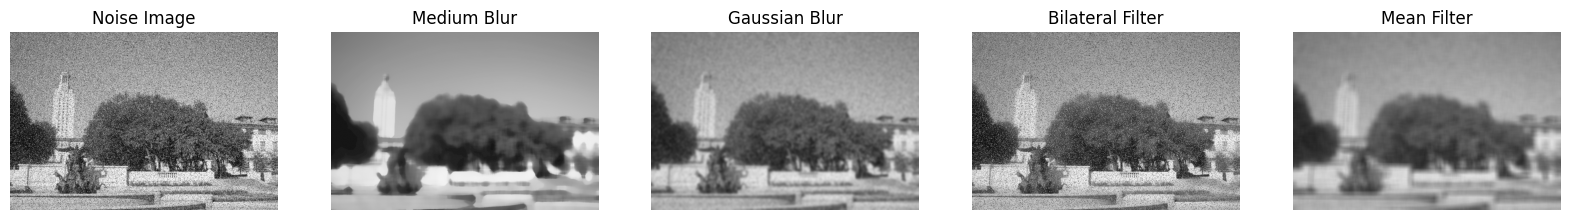

In [33]:
noise_image = cv2.imread(os.path.join(dataDir, 'stitch_building01_2.png'),cv2.IMREAD_GRAYSCALE)

def add_noise(img, percentage):
    height, width = img.shape
    n_pixels = int(percentage * height * width)

    for _ in range(n_pixels + 1):
        # Select random coord
        pos = (random.randint(0, height - 1), random.randint(0, width - 1))
        # random between white and black
        color = random.randint(0,1)

        img[pos[0], pos[1]] = color * 255

    return img

noise_image = add_noise(noise_image, 0.2)

f, axarr = plt.subplots(1, 5, figsize=(20, 10))
axarr[0].imshow(noise_image, cmap="gray", vmin=0, vmax=255)
axarr[0].set_title("Noise Image")
axarr[0].axis("off")

# All types of smoothing
KERNEL_LENGTH = 25

median_blur = cv2.medianBlur(noise_image,KERNEL_LENGTH)

gaussian_blur = cv2.GaussianBlur(noise_image,(KERNEL_LENGTH, KERNEL_LENGTH), 0)

bilateral_filter = cv2.bilateralFilter(noise_image,KERNEL_LENGTH, KERNEL_LENGTH * 2, KERNEL_LENGTH/2)

mean_filter = cv2.blur(noise_image, ksize=(KERNEL_LENGTH, KERNEL_LENGTH))

axarr[1].imshow(median_blur, cmap="gray", vmin=0, vmax=255)
axarr[1].set_title("Medium Blur")
axarr[1].axis("off")

axarr[2].imshow(gaussian_blur, cmap="gray", vmin=0, vmax=255)
axarr[2].set_title("Gaussian Blur")
axarr[2].axis("off")

axarr[3].imshow(bilateral_filter, cmap="gray", vmin=0, vmax=255)
axarr[3].set_title("Bilateral Filter")
axarr[3].axis("off")

axarr[4].imshow(mean_filter, cmap="gray", vmin=0, vmax=255)
axarr[4].set_title("Mean Filter")
axarr[4].axis("off")


(Why did the bilateral filter work well previously, but not now?)

Exercise 1.3: Apply your own 3x3 mean filter using [ndimage.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html). Look at the lecture slides for the filter definition.

(np.float64(-0.5), np.float64(388.5), np.float64(261.5), np.float64(-0.5))

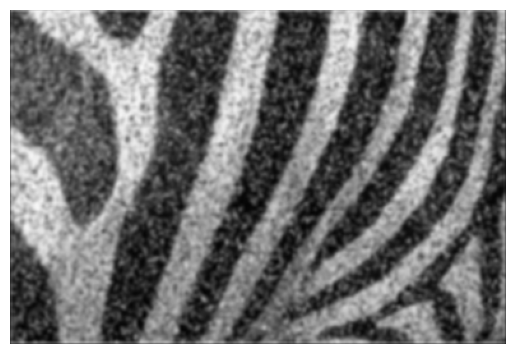

In [49]:
img = cv2.imread(os.path.join(dataDir, 'zebra_01_noisy.jpg'), cv2.IMREAD_GRAYSCALE)

weights = np.array([[1,1,1],[1,1,1],[1,1,1]]) * (1/9)

mean_filter = ndimage.convolve(img,weights=weights,mode='constant', cval=0) 

plt.imshow(mean_filter, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

Exercise 1.4: Apply your own 3x3 Gaussian filter using [ndimage.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).

Sum of weights 1.0


(np.float64(-0.5), np.float64(388.5), np.float64(261.5), np.float64(-0.5))

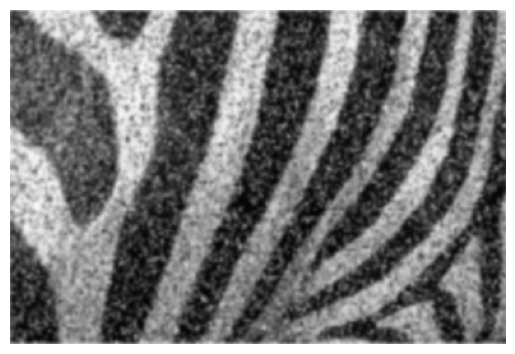

In [73]:
img = cv2.imread(os.path.join(dataDir, 'zebra_01_noisy.jpg'), cv2.IMREAD_GRAYSCALE)

def gaussian_function(pos, alpha=0.8):
    gaussian = ( 1 / (2 * np.pi * np.pow(alpha,2))) * np.exp(- (np.pow(pos[0], 2) + np.pow(pos[1], 2)) / (2 * np.pow(alpha,2)))

    return gaussian


position_array = [[(-1,1),(0,1),(1,1)],
                  [(-1,0),(0,0),(1,0)],
                  [(-1,-1),(0,-1),(1,-1)]]

weights = []
for row in position_array:
    temp = []
    for pos in row:
        value = gaussian_function(pos)
        temp+=[value]
    
    weights+= [temp]
    temp = []

# Normalize so the sum of the whole array is one (can get darker/brighter)
weights = np.array(weights) / np.sum(weights)

print(f"Sum of weights {np.sum(weights)}")

gaussian_filter = ndimage.convolve(img,weights=weights) 

plt.imshow(gaussian_filter, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

Exercise 1.5: Apply two 3x3 Sobel filters (one in the X-direction, the other in the Y-direction) using [ndimage.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html). Look at the lecture slides for the filter definition.

In [ ]:
img = cv2.imread(os.path.join(dataDir, 'apple.jpg'), cv2.IMREAD_GRAYSCALE)

# TODO

Exercise 1.6: Apply your own 3x3 Gaussian filter using [ndimage.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html), but now to a colored image.

In [ ]:
img = cv2.imread(os.path.join(dataDir, 'apple.jpg'))

# TODO

### 2. Histogram Equalization

In [ ]:
# Load low contrast image
img = cv2.imread(os.path.join(dataDir, 'face_lowContrast_01.jpg'), cv2.IMREAD_GRAYSCALE) # Change this, according to your image's path

plt.imshow(img, cmap="gray", vmin=0, vmax=255)
_ = plt.axis("off")

[Histograms Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

In [ ]:
# Increasing contrast with Histograms Equalization
img_with_he = cv2.equalizeHist(img)

plt.imshow(img_with_he, cmap="gray", vmin=0, vmax=255)
_ = plt.axis("off")

[Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018)

In [ ]:
# Increasing contrast with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_with_CLAHE = clahe.apply(img)

plt.imshow(img_with_CLAHE, cmap="gray", vmin=0, vmax=255)
_ = plt.axis("off")

Exercise 2.1: Apply Histogram Equalization to a colored image

In [ ]:
img = cv2.imread(os.path.join(dataDir, 'lowContrast_05.jpg'))

# TODO

Exercise 2.2: Apply CLAHE to a colored image

In [ ]:
img = cv2.imread(os.path.join(dataDir, 'lowContrast_05.jpg'))

# TODO